Learning Rate : 0.01


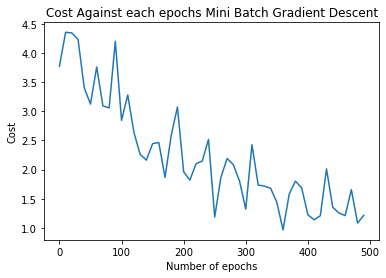

Learning Rate : 0.05


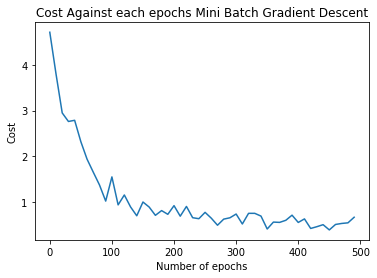

Learning Rate : 0.1


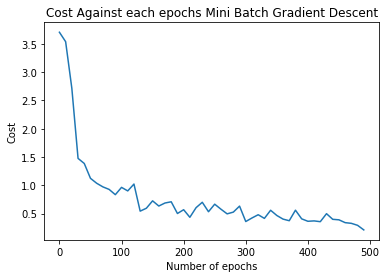

Learning Rate : 0.2


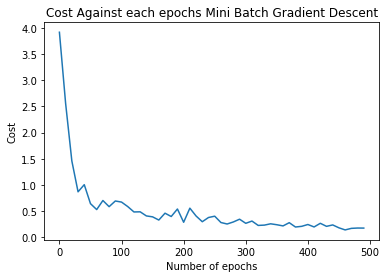

Learning Rate : 0.3


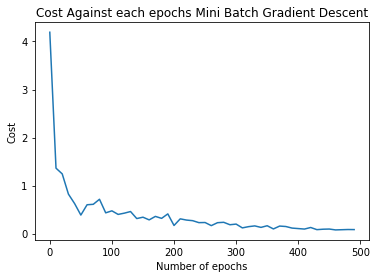

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


class LinearRegression:

    def dataset_generation(self, training_size):
        """
            dataset_generation is the function to create the dataset using
            some specific parameter :
            equation -> y = Xw + b + ϵ
            w is the Weight Vector
            b is the baise
            ϵ is the noise added in the dataset
            X is the points
        """
        dataset = {
            'x1': [],
            'x2': [],
            'x3': [],
            'y': []
        }
        for i in range(0, training_size):
            X = np.random.uniform(0, 1, 3)
            weights = np.array([3, 2.5, -1])
            bias = 1
            noise = 0.03
            Y = np.dot(weights, X) + bias + noise

            dataset['x1'].append(X[0])
            dataset['x2'].append(X[1])
            dataset['x3'].append(X[2])
            dataset['y'].append(Y)

        return pd.DataFrame.from_dict(dataset).to_csv('Data/Data.csv', index_label=False)

    def visualization_dataset(self, epochs_list, cost_list, title):
        plt.plot(epochs_list, cost_list)
        plt.xlabel('Number of epochs')
        plt.ylabel('Cost')
        plt.title(f'Cost Against each epochs {title}')
        plt.show()

    def mean_square_error(self, m, b, data):
        X = np.array(data.x1)
        Y = np.array(data.y)
        total_error = 0
        for x, y in zip(X, Y):
            total_error += ((y - (m * x) + b)) ** 2
        return total_error / float(len(X))

    def mini_batch_gradient_descent(self, data_path, learning_rate, epochs, batch_size):
        data = pd.read_csv(data_path)

        if batch_size == data.shape[0]:
            # case when batch size equal to the total number of example
            self.batch_gradient_descent(data_path, learning_rate, epochs)
        elif batch_size == 1:
            # cost When batch size equal to the 1
            self.stochastic_gradient_descent(data_path, learning_rate, epochs)
        else:

            Y = np.array(data.y)
            X = np.array(data.drop('y', axis=1))

            no_of_features = X.shape[1]
            no_of_sample = data.shape[0]

            m = np.ones(shape=(no_of_features))
            b = 0
            epochs_list, cost_list = [], []

            for epoch in range(0, epochs):
                # sample_index for mini batch
                sample_index = np.random.randint(0, no_of_sample - 1, batch_size)
                # predict line of linear regression
                batch_X = X[sample_index]
                batch_Y = Y[sample_index]

                guess = np.dot(m, batch_X.T) + b

                m_grad = -(2 / no_of_sample) * (batch_X.T.dot(batch_Y - guess))
                b_grad = -(2 / no_of_sample) * np.sum(((batch_Y - guess)))

                # update the slope and baise after taking derivatives
                m = m - learning_rate * m_grad
                b = b - learning_rate * b_grad

                # computing mean square error as cost function
                cost = np.mean(np.square(batch_Y - guess))

                if epoch % 10 == 0:
                    cost_list.append(cost)
                    epochs_list.append(epoch)
                # print(f'M : {m} ,B : {b} , Cost : {cost}' )

            # visualization of cost against each epocsh
            self.visualization_dataset(epochs_list, cost_list, 'Mini Batch Gradient Descent')
            
            return m ,b

    def batch_gradient_descent(self, data_path, learning_rate, epochs):

        data = pd.read_csv(data_path)

        Y = np.array(data.y)
        X = np.array(data.drop('y', axis=1))

        no_of_features = X.shape[1]
        no_of_sample = data.shape[0]

        m = np.ones(shape=(no_of_features))
        b = 0
        epochs_list, cost_list = [], []

        for epoch in range(0, epochs):
            # predict line of linear regression
            guess = np.dot(m, X.T) + b

            m_grad = -(2 / no_of_sample) * (X.T.dot(Y - guess))
            b_grad = -(2 / no_of_sample) * np.sum(((Y - guess)))

            # update the slope and baise after taking derivatives
            m = m - learning_rate * m_grad
            b = b - learning_rate * b_grad

            # computing mean square error as cost function
            cost = np.mean(np.square(Y - guess))

            if epoch % 10 == 0:
                cost_list.append(cost)
                epochs_list.append(epoch)
            # print(f'M : {m} ,B : {b} , Cost : {cost}' )

        self.visualization_dataset(epochs_list, cost_list, 'Batch Gradient Descent')
        return m ,b

    def stochastic_gradient_descent(self, data_path, learning_rate, epochs):

        data = pd.read_csv(data_path)

        Y = np.array(data.y)
        X = np.array(data.drop('y', axis=1))

        no_of_features = X.shape[1]
        no_of_sample = data.shape[0]

        m = np.zeros(shape=(no_of_features))
        b = 0
        epochs_list, cost_list = [], []

        for epoch in range(0, epochs):
            random_sample = np.random.randint(0, no_of_sample - 1)
            X_saample = X[random_sample]
            y_sample = Y[random_sample]

            # predict line of linear regression
            guess = np.dot(m, X_saample.T) + b

            m_grad = -(2 / no_of_sample) * (X_saample.T.dot(y_sample - guess))
            b_grad = -(2 / no_of_sample) * (y_sample - guess)

            # update the slope and baise after taking derivatives
            m = m - learning_rate * m_grad
            b = b - learning_rate * b_grad

            # computing mean square error
            cost = np.mean(np.square(y_sample - guess))

            if epoch % 100 == 0:
                cost_list.append(cost)
                epochs_list.append(epoch)
        print(f'M : {m} ,B : {b} , Cost : {cost}')

        self.visualization_dataset(epochs_list, cost_list, 'Stochastic Gradient Descent')
        return m ,b


if __name__ == "__main__":
    LG = LinearRegression()

    # Dataset Creation Calling
    y = LG.dataset_generation(training_size=1000)

    # Data Visualization
    data_path = 'Data/Data.csv'
    # LG.visualization_dataset(data_path, False, 0, 0)

    #     # # calling batch Gradient Descent
    #     LG.batch_gradient_descent(data_path, 0.03, 500)

    #     # calling  batch Gradient Descent
    #     LG.stochastic_gradient_descent(data_path, 0.03, 500)

    # calling for Mini Batch gradient Descent
    for learning_rate  in  [0.01, 0.05, 0.1, 0.2, 0.3]:
        batch_size = 50
        print(f'Learning Rate : {learning_rate}')
        LG.mini_batch_gradient_descent(data_path, learning_rate, 500, batch_size)


In [2]:
data_path = 'Data/Data.csv'

In [3]:
df =  pd.read_csv(data_path)

In [4]:
df.shape[0]

1000